# Train on real data - Transfer Learning

In [16]:
%load_ext autoreload
%autoreload 2

import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

from utils import *
from models import *
from classes1 import *
import config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
STUDY_PATH = config.STUDY_PATH
GEN_DFS_PATH = config.GEN_DFS_PATH
REAL_FILE = config.REAL_FILE
REAL_FILE_ALL = config.REAL_FILE_ALL
TPL_PATH = config.TPL_PATH

TRAIN_VAL_RATIO_REAL = config.TRAIN_VAL_RATIO_REAL
TRAIN_VAL_RATIO_GEN = config.TRAIN_VAL_RATIO_GEN
N_STEPS = config.N_STEPS
N_FEATURES_IN = config.N_FEATURES_IN
N_FEATURES_OUT = config.N_FEATURES_OUT

pd.options.display.max_columns = 25

STUDY_PATH, GEN_DFS_PATH, REAL_FILE, TPL_PATH, TRAIN_VAL_RATIO_REAL, TRAIN_VAL_RATIO_GEN

('C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]',
 'C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/gens',
 'C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/real.csv',
 'C:\\Users\\Asus\\Desktop\\Skoltech\\Multiphase flows\\olga_proj\\Subsea_Study[7]',
 0.3333333333333333,
 0.8)

Train on 367 samples, validate on 181 samples
Epoch 1/1
367/367 [==============================] - ETA: 1s - loss: 0.407 - 0s 935us/step - loss: 0.3775 - val_loss: 0.3070


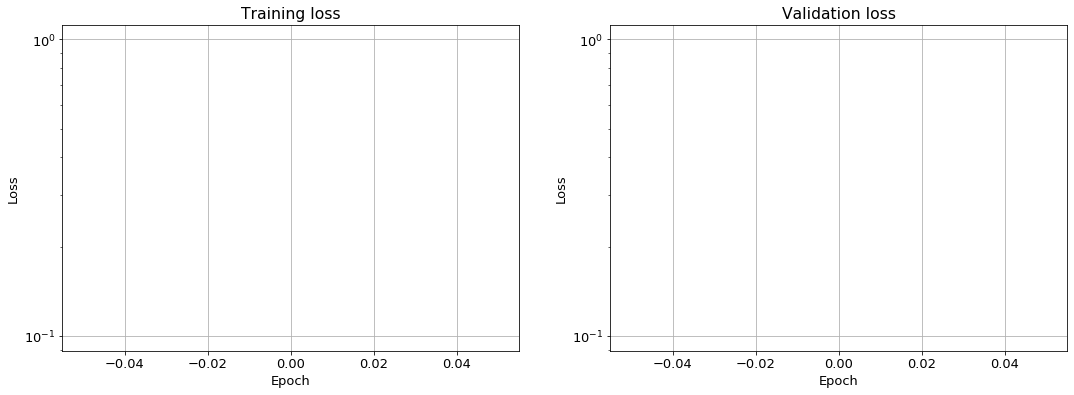

Model name:       MLP-3
Training time:    0.565 sec
Train error:      27.556
Val error:        27.442
Test error (avg): 28.480
           (oil): 41.152
           (gas): 21.266
           (wat): 23.023

here


TypeError: cannot unpack non-iterable NoneType object

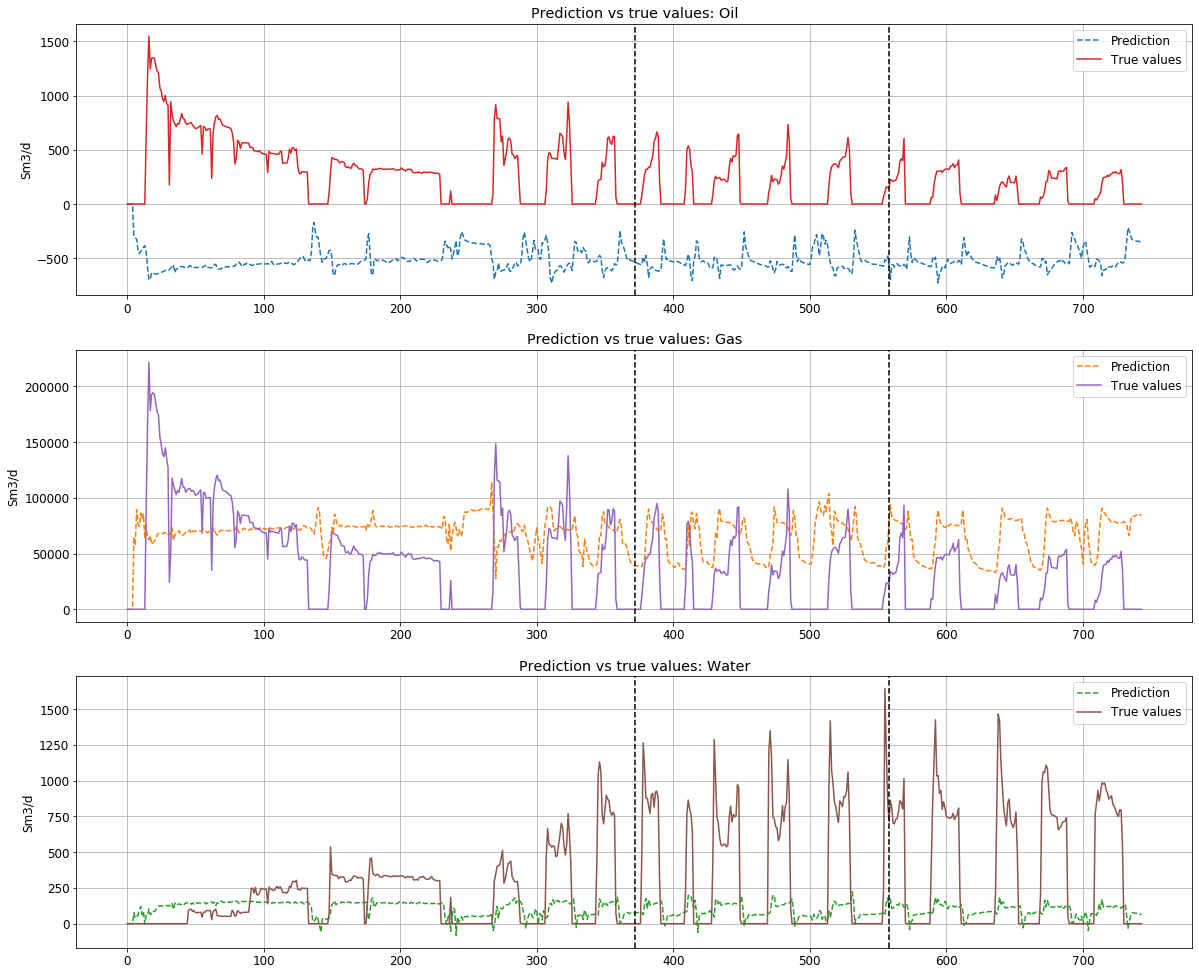

In [18]:
m = Init(model_name='MLP-3', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE_ALL, 
         train_all_ratio=1/2, 
         loss='mae', 
         lr=1e-4,
         n_layers=3, 
         n_neurons=50,
         dropout=0.2)

m.train(n_epochs=1, verbose=True)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# # m.save()

## 1. Train real init

### MLP

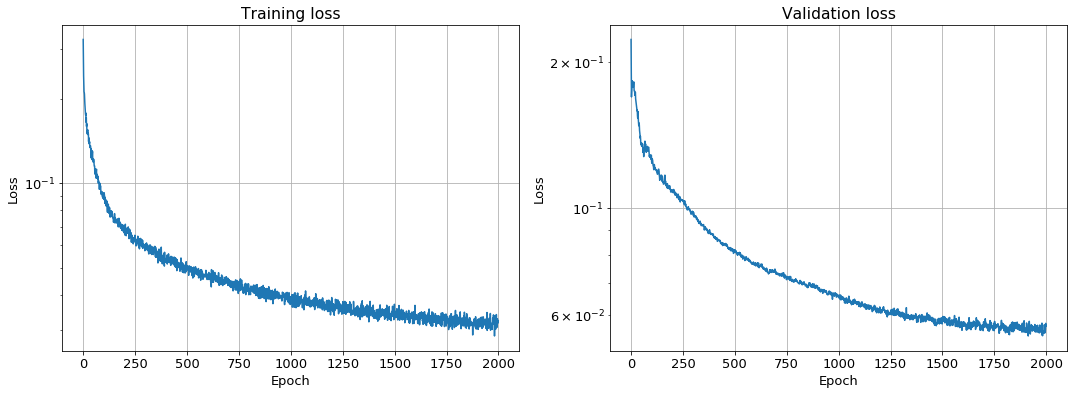

Model name:       MLP-3
Training time:    56.939 sec
Train error:      2.392
Val error:        4.429
Test error (avg): 6.005
           (oil): 4.407
           (gas): 4.332
           (wat): 9.276



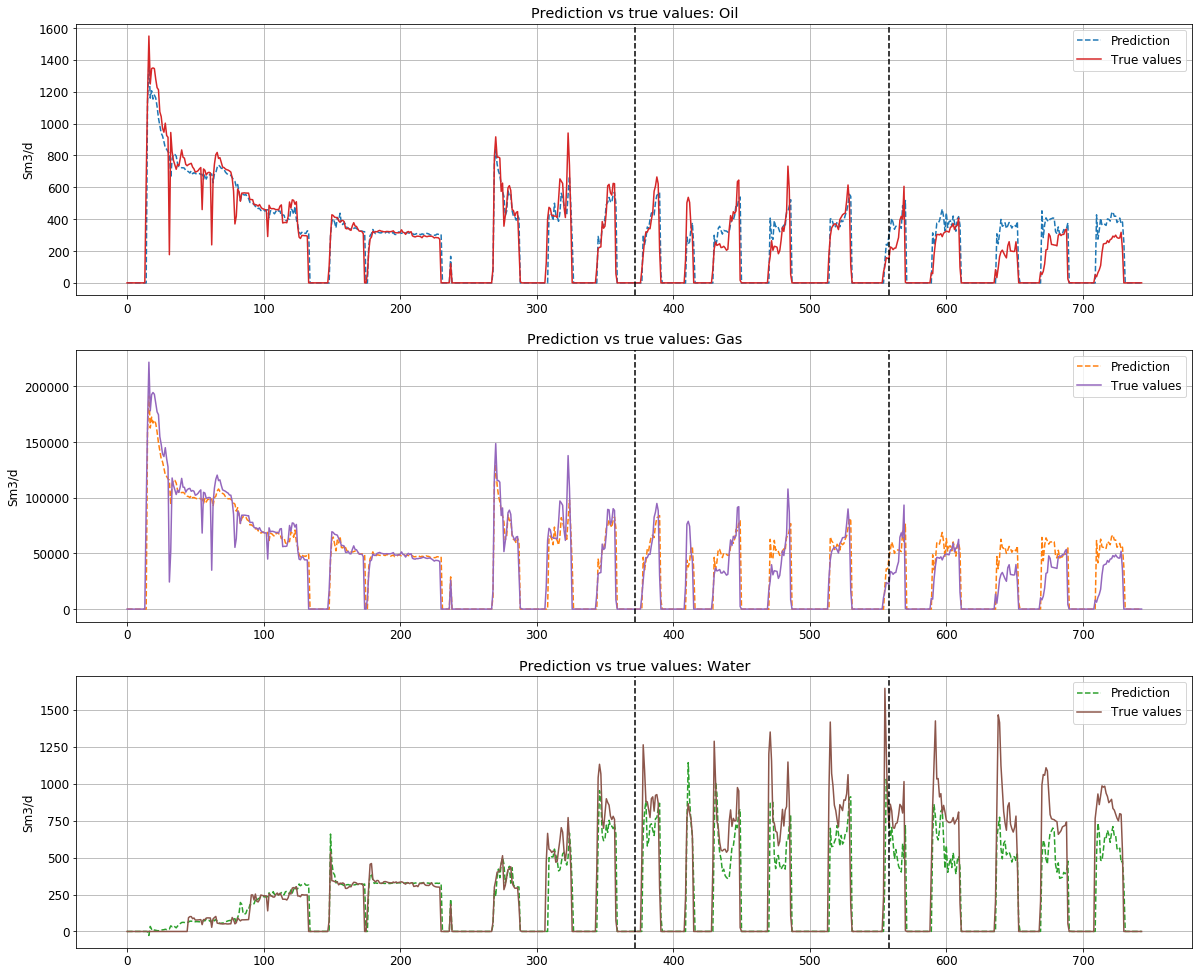

In [17]:
m = Init(model_name='MLP-3', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE_ALL, 
         train_all_ratio=1/2, 
         loss='mae', 
         lr=1e-4,
         n_layers=3, 
         n_neurons=50,
         dropout=0.2)

m.train(n_epochs=2000, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

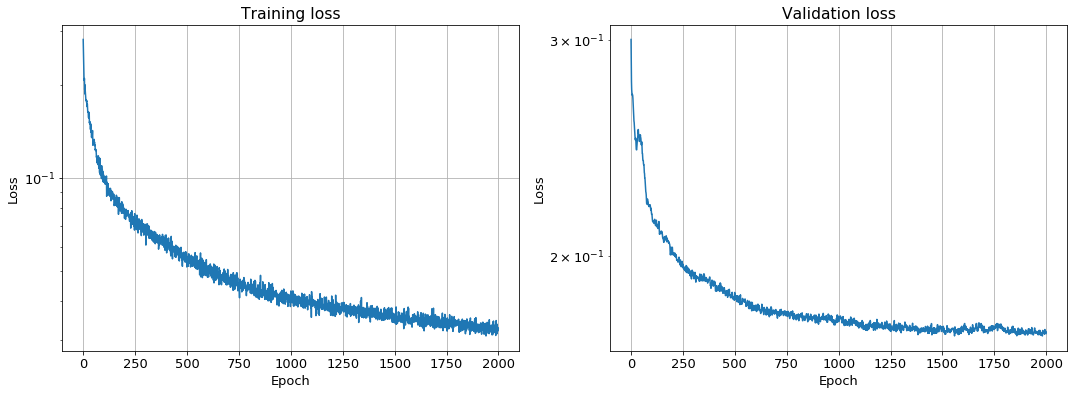

Model name:       MLP-3
Training time:    47.723 sec
Train error:      2.649
Val error:        8.418
Test error (avg): 7.986
           (oil): 4.400
           (gas): 4.531
           (wat): 15.027



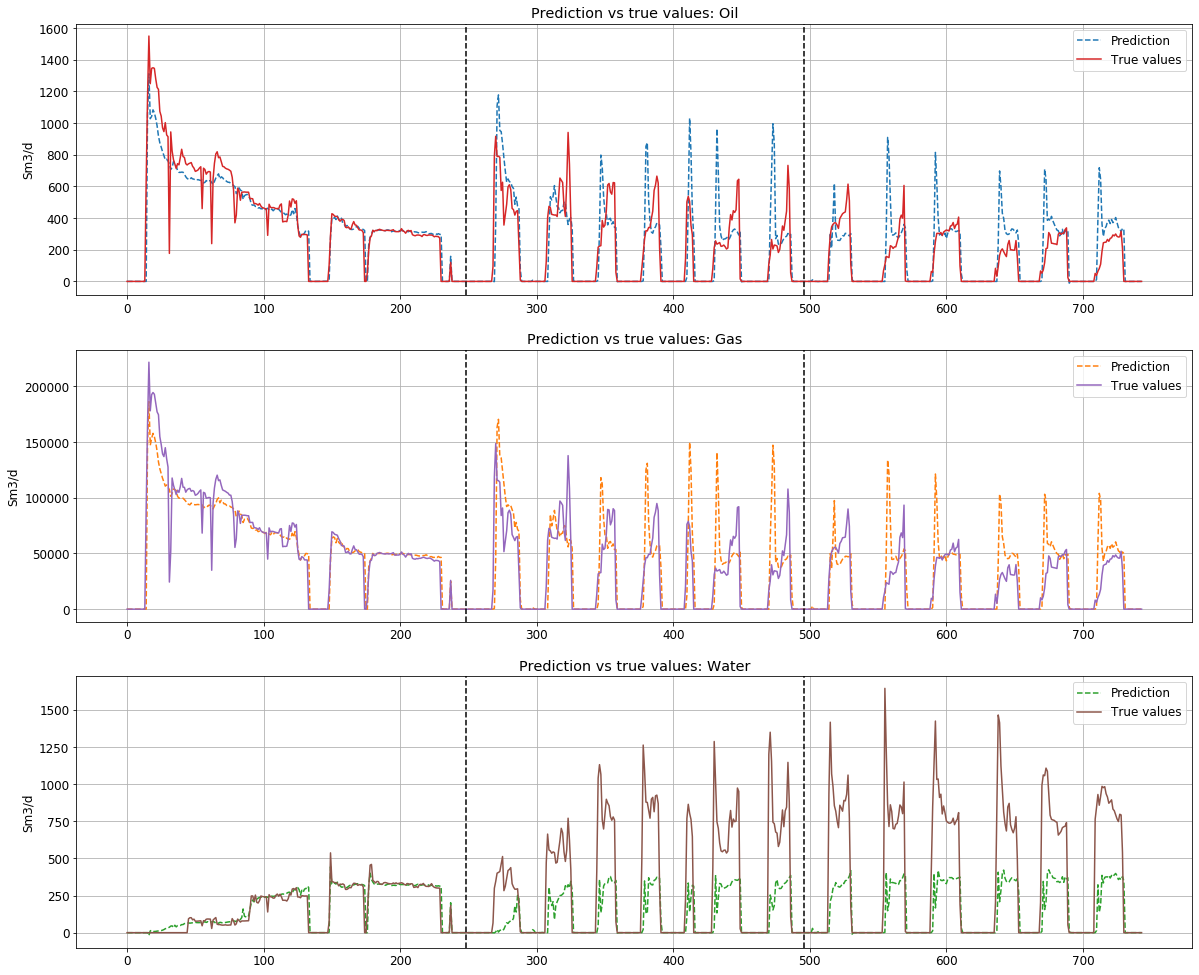

In [18]:
m = Init(model_name='MLP-3', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE_ALL, 
         train_all_ratio=1/3, 
         loss='mae', 
         lr=1e-4,
         n_layers=3, 
         n_neurons=50,
         dropout=0.2)

m.train(n_epochs=2000, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

In [30]:
n_experiments = 5
errs, times = [], []

for i in tqdm_notebook(range(n_experiments)):
    m = Init(model_name='MLP-3', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE_ALL, 
         train_all_ratio=TRAIN_VAL_RATIO_REAL, 
         loss='mae', 
         lr=1e-4,
         n_layers=3, 
         n_neurons=50,
         dropout=0.2)

    m.train(n_epochs=2000, verbose=False)
    err, t = m.predict(plot_losses=False, plot_preds=False, plot_errs=False, print_res=False)
    errs.append(err)
    times.append(time)
    
print (f'Error: %.2f+-%.2f' % (np.mean(errs), np.std(errs)))
# print (f'Time:  %.3f sec' % (times[0]))


Error: 6.58+-0.74


### LSTM

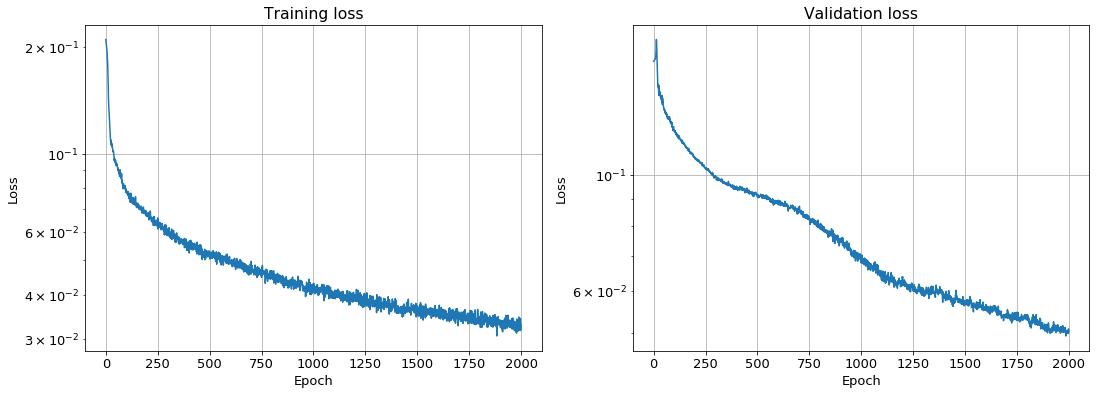

Model name:       LSTM-3
Training time:    642.554 sec
Train error:      2.819
Val error:        3.971
Test error (avg): 5.505
           (oil): 5.230
           (gas): 4.814
           (wat): 6.473



(5.505367623866428, 642.0)

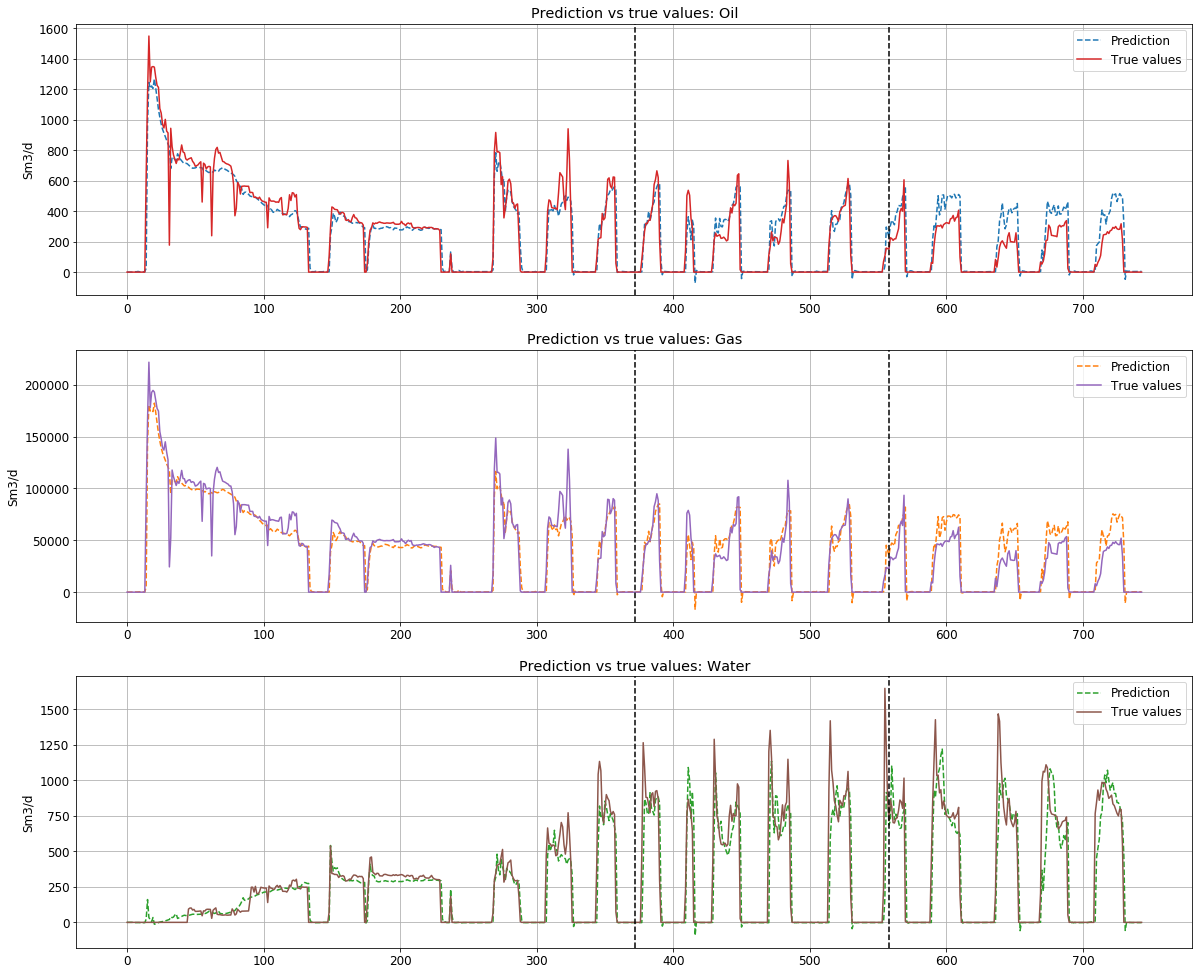

In [23]:
m = Init(model_name='LSTM-3', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE_ALL, 
         train_all_ratio=1/2, 
         loss='mae', 
         lr=1e-4,
         n_layers=3, 
         n_neurons=50,
         dropout=0.2)

m.train(n_epochs=2000, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

In [ ]:
m = Init(model_name='LSTM-3', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE_ALL, 
         train_all_ratio=1/3, 
         loss='mae', 
         lr=1e-4,
         n_layers=3, 
         n_neurons=50,
         dropout=0.2)

m.train(n_epochs=2000, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

[autoreload of utils failed: Traceback (most recent call last):
  File "C:\Users\Asus\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Asus\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 434, in superreload
    module = reload(module)
  File "C:\Users\Asus\Anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\Asus\Anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\Asus\Desktop\Skoltech\Multiphase flows\code\utils.py", l

In [50]:
n_experiments = 5
errs, times = [], []

for i in tqdm_notebook(range(n_experiments)):
    m = Init(model_name='LSTM-3', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE_ALL, 
         train_all_ratio=TRAIN_VAL_RATIO_REAL, 
         loss='mae', 
         lr=1e-4,
         n_layers=3, 
         n_neurons=50,
         dropout=0.2)

    m.train(n_epochs=1500, verbose=False)
    err, t = m.predict(plot_losses=False, plot_preds=False, plot_errs=False, print_res=False)
    errs.append(err)
    times.append(time)
    
print (f'Error: %.2f+-%.2f' % (np.mean(errs), np.std(errs)))
# print (f'Time:  %.3f sec' % (times[0]))


Error: 10.02+-0.82


### TCN

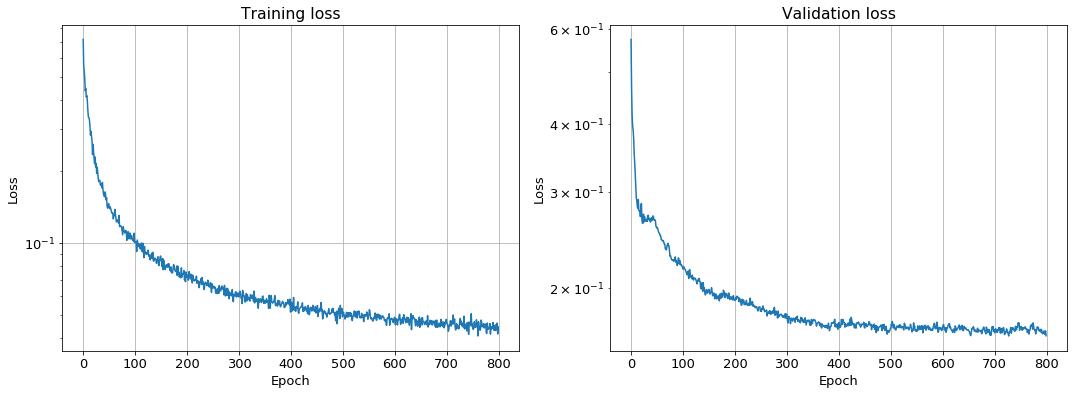

Model name:       TCN-3
Training time:    112.462 sec
Train error:      2.261
Val error:        8.105
Test error (avg): 8.424
           (oil): 5.638
           (gas): 5.786
           (wat): 13.849



(8.424379978597218, 112.0)

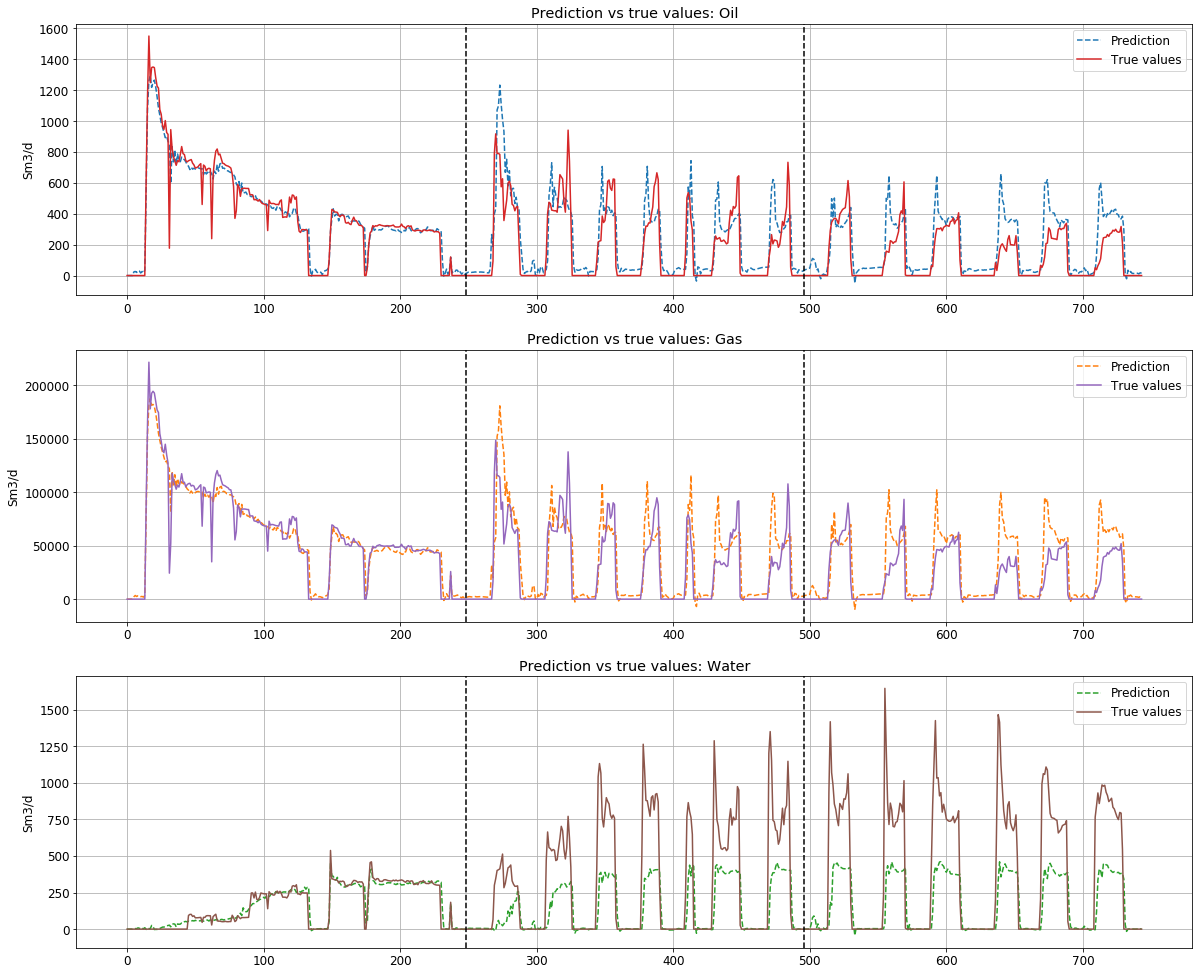

In [19]:
m = Init(model_name='TCN-3', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE_ALL, 
         train_all_ratio=1/3, 
         loss='mae', 
         lr=1e-4)

m.train(n_epochs=800, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

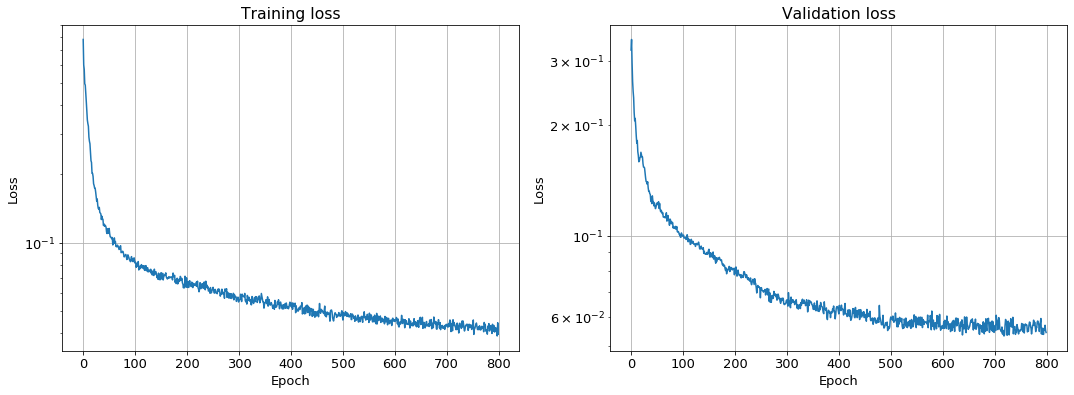

Model name:       TCN-3
Training time:    136.416 sec
Train error:      2.696
Val error:        4.602
Test error (avg): 4.684
           (oil): 4.920
           (gas): 4.575
           (wat): 4.558



(4.6843739632030985, 136.0)

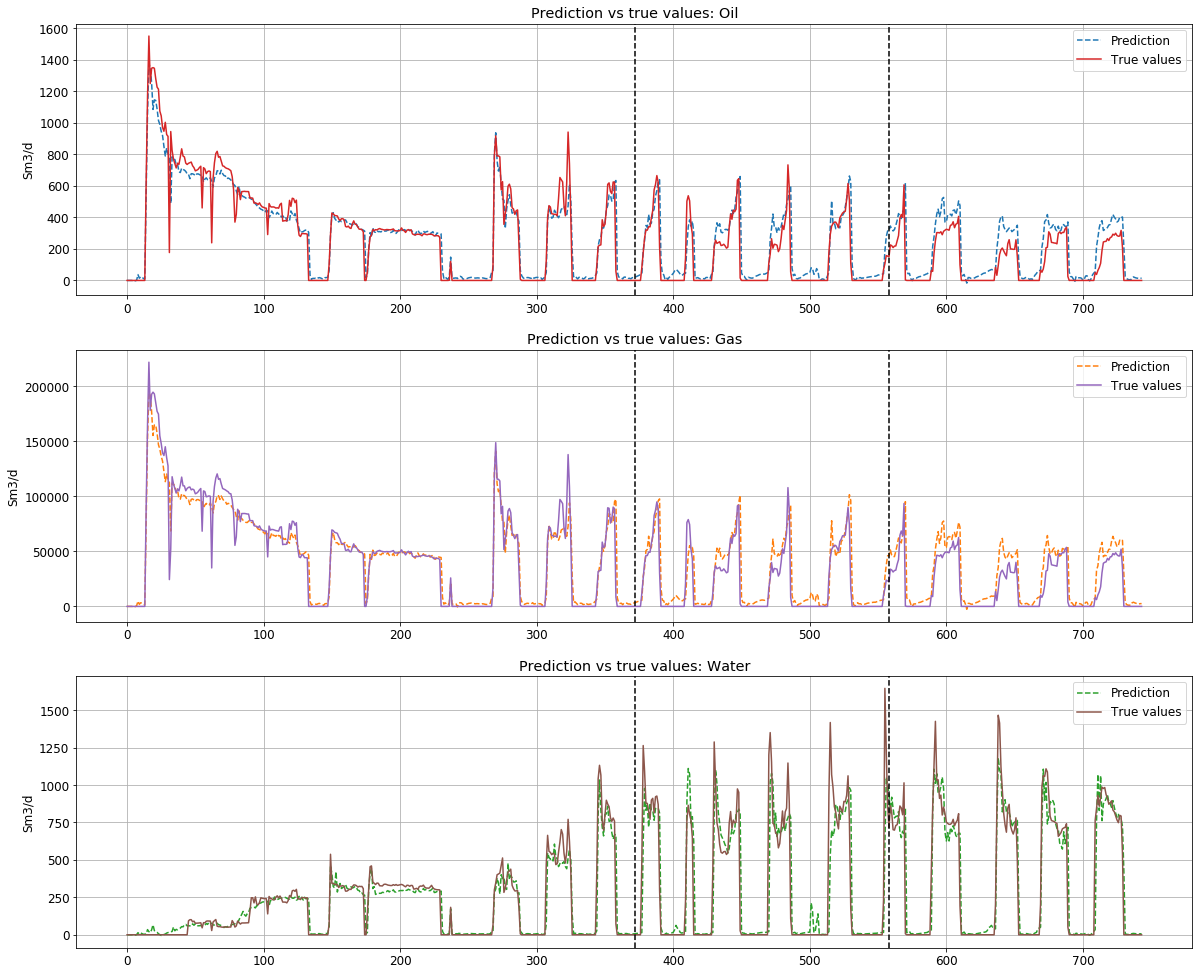

In [20]:
m = Init(model_name='TCN-3', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE_ALL, 
         train_all_ratio=1/2, 
         loss='mae', 
         lr=1e-4)

m.train(n_epochs=800, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

In [40]:
n_experiments = 5
errs, times = [], []

for i in tqdm_notebook(range(n_experiments)):
    m = Init(model_name='TCN-3', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE_ALL, 
         train_all_ratio=TRAIN_VAL_RATIO_REAL, 
         loss='mae')

    m.train(n_epochs=700, verbose=False)
    err, t = m.predict(plot_losses=False, plot_preds=False, plot_errs=False, print_res=False)
    errs.append(er
    times.append(time)
    
print (f'Error: %.2f+-%.2f' % (np.mean(errs), np.std(errs)))
# print (f'Time:  %.3f sec' % (times[0]))


Error: 6.24+-0.46


### XGB

In [ ]:
m = Init(model_name='XGB-3', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE_ALL, 
         train_all_ratio=1/2,
         n_neurons=100,
         max_depth=2,
         reg_alpha=1)

m.train()
m.predict(plot_losses=False, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

In [ ]:
m = Init(model_name='XGB-3', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE_ALL, 
         train_all_ratio=1/3,
         n_neurons=100,
         max_depth=2,
         reg_alpha=1)

m.train()
m.predict(plot_losses=False, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

In [ ]:
n_experiments = 5
errs, times = [], []

for i in tqdm_notebook(range(n_experiments)):
    m = Init(model_name='XGB-3', 
         study_path=STUDY_PATH, 
         real_file=REAL_FILE_ALL, 
         train_all_ratio=TRAIN_VAL_RATIO_REAL)

    m.train()
    err, t = m.predict(plot_losses=False, plot_preds=False, plot_errs=False, print_res=False)
    errs.append(err)
    times.append(time)
    
print (f'Error: %.2f+-%.2f' % (np.mean(errs), np.std(errs)))
# print (f'Time:  %.3f sec' % (times[0]))

## 2. Train real transfer

### MLP

#### Transfer

In [6]:
TRAIN_VAL_RATIO_REAL = 1/2

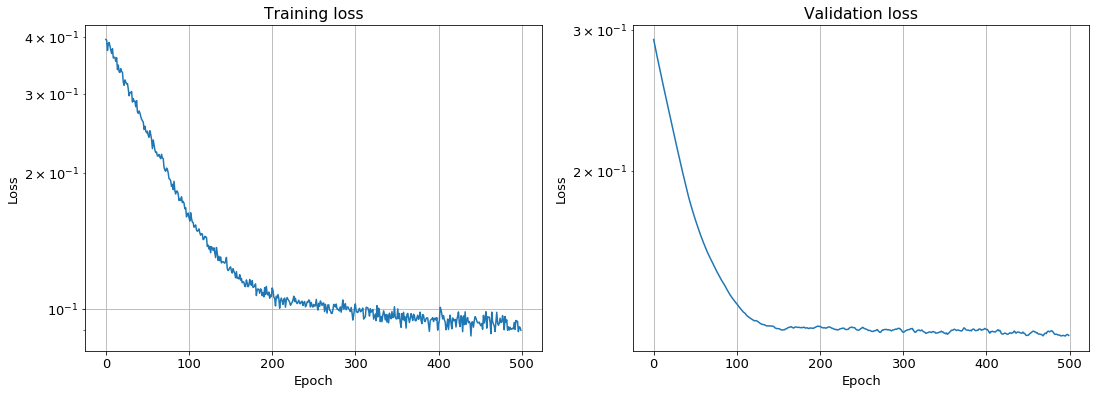

Model name:       MLP-1
Training time:    13.203 sec
Train error:      7.248
Val error:        9.905
Test error:       11.643
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/MLP-1-transf.hdf saved


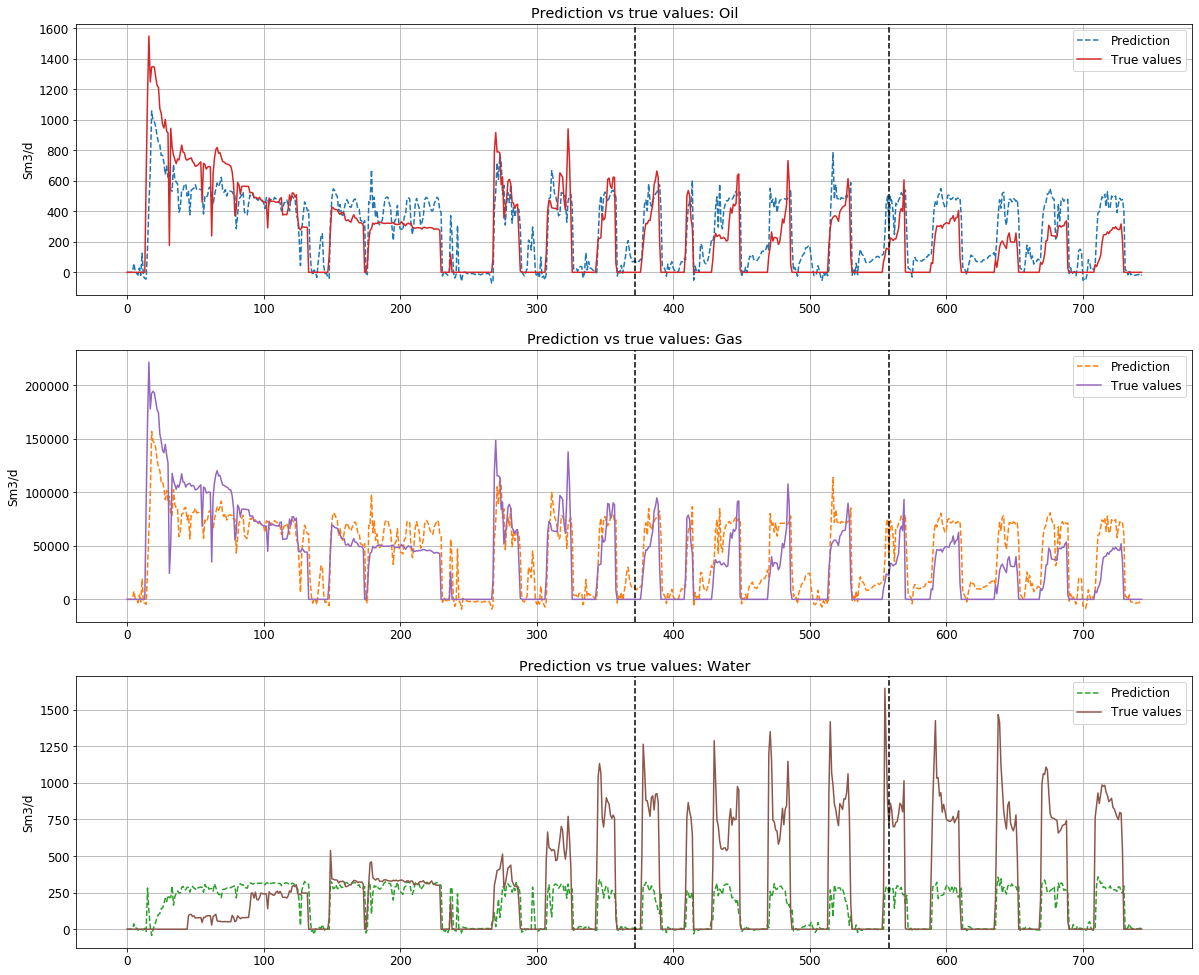

In [9]:
m = TL(model_name='MLP-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=500, tuning=False, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

#### Tuning

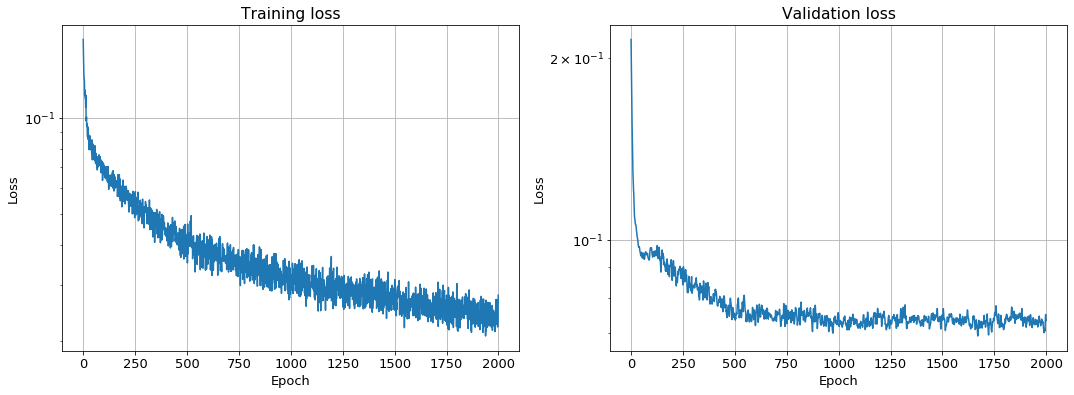

Model name:       MLP-1
Training time:    51.564 sec
Train error:      1.367
Val error:        6.686
Test error:       8.029
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/MLP-1-tuning.hdf saved


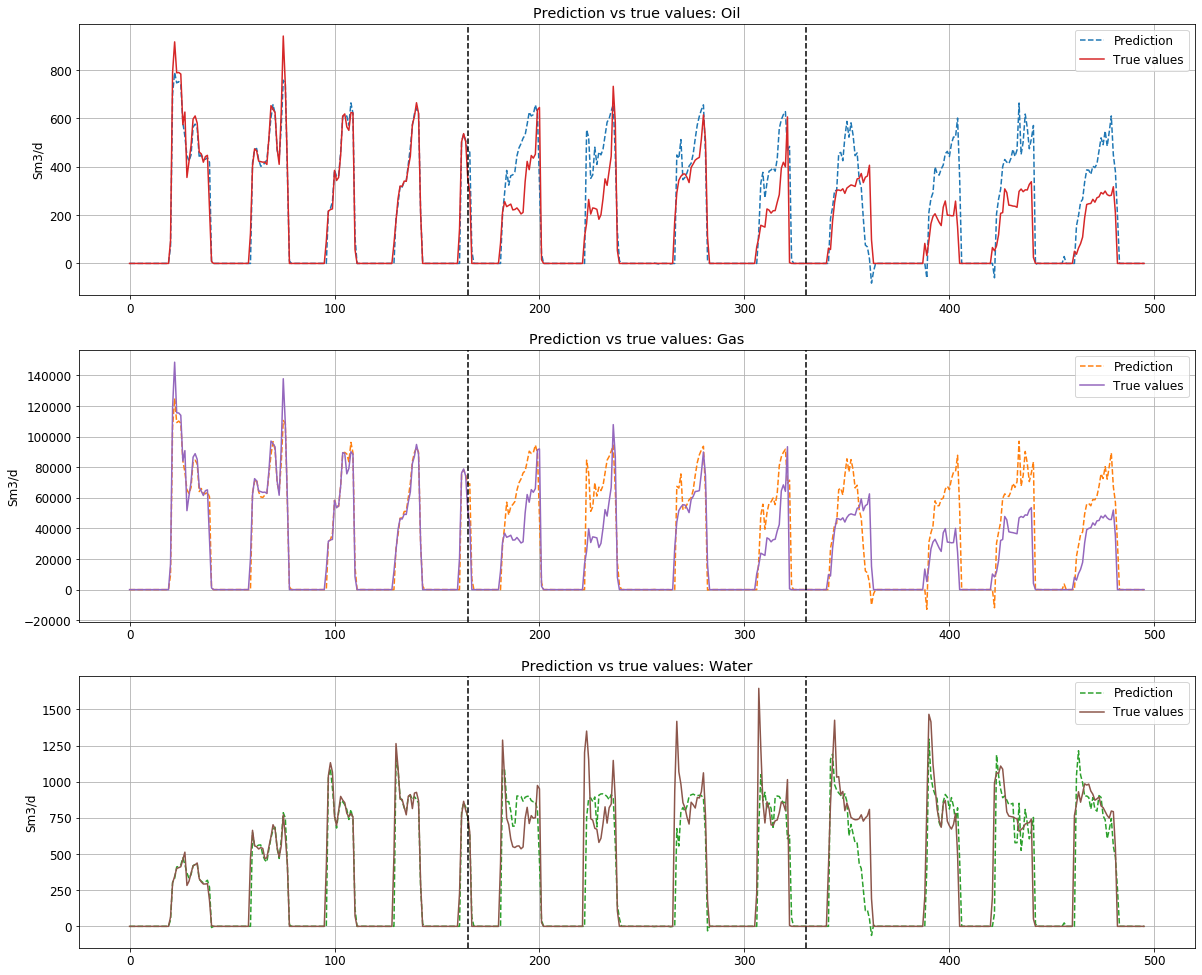

In [9]:
m = TL(model_name='MLP-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=2000, tuning=True, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

#### Transfer -> Tuning

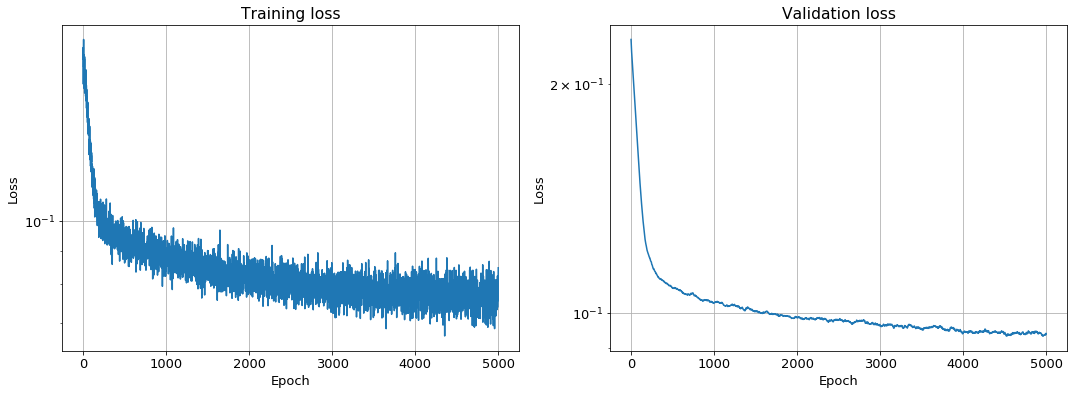

Model name:       MLP-1
Training time:    79.059 sec
Train error:      6.042
Val error:        8.644
Test error:       10.907


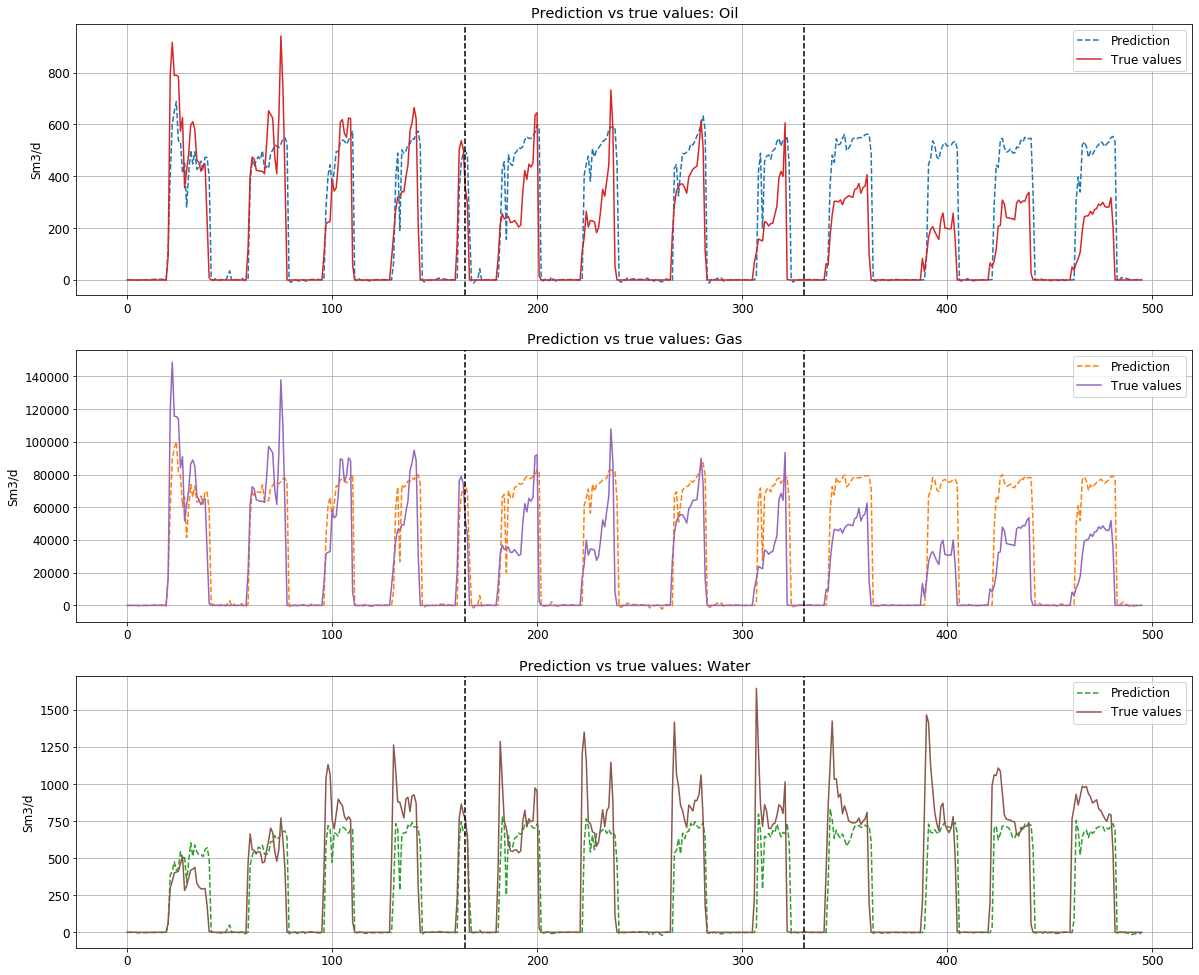

In [13]:
m = TL(model_name='MLP-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=5000, tuning=False, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

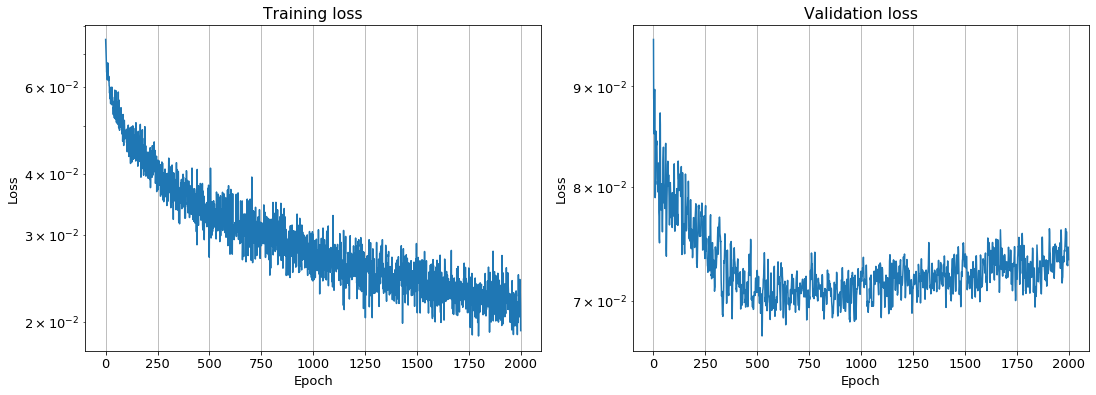

Model name:       MLP-1
Training time:    53.918 sec
Train error:      1.266
Val error:        6.658
Test error:       7.712


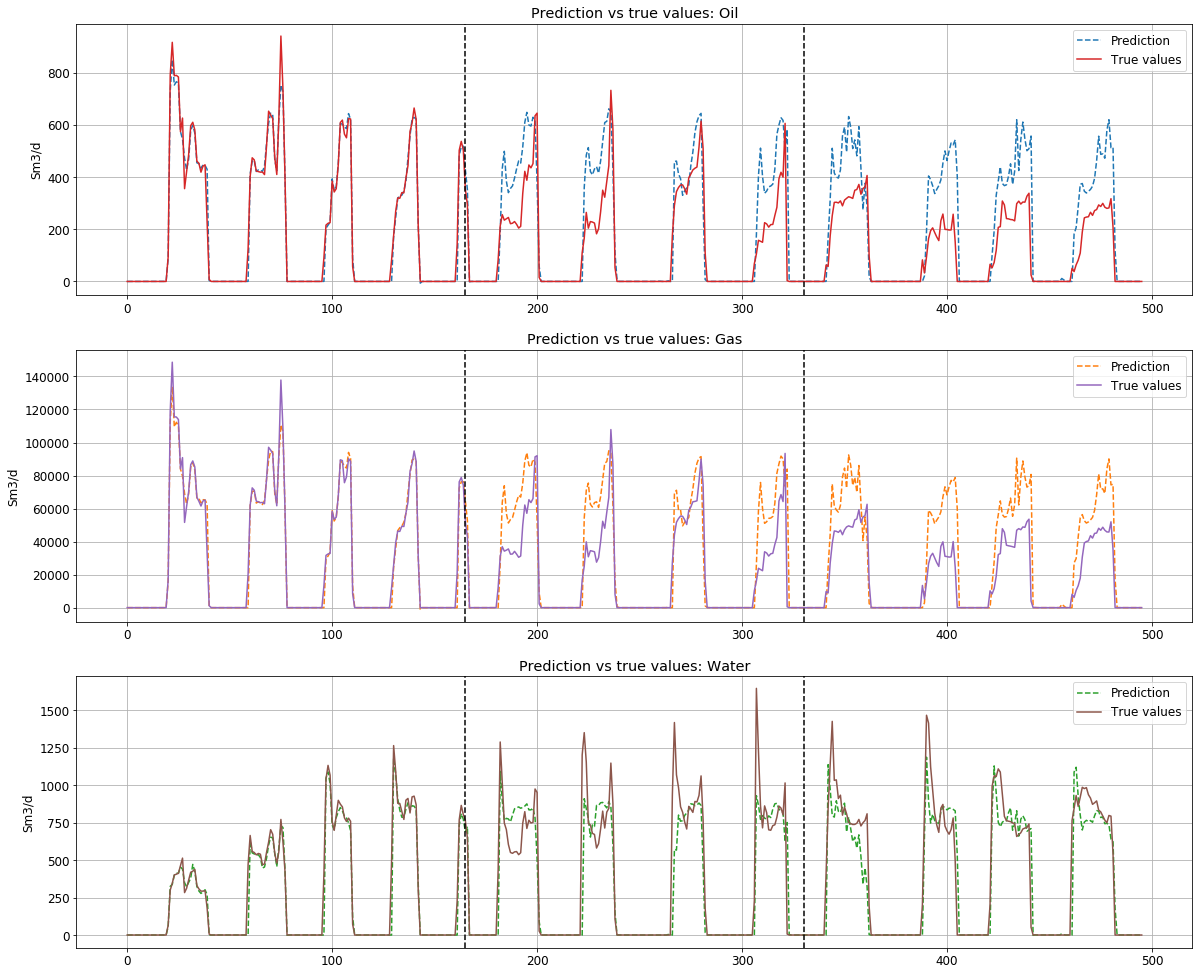

In [14]:
m.train(n_epochs=2000, tuning=True, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

### TCN

#### Transfer

In [22]:
m = TL(model_name='TCN-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=2000, tuning=False, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

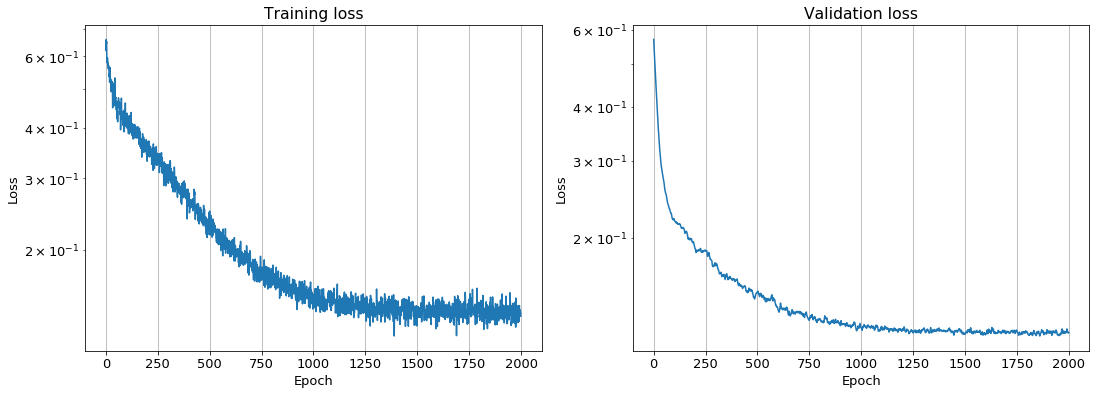

Model name:       TCN-1
Training time:    119.475 sec
Train error:      10.698
Val error:        10.940
Test error:       10.137
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/TCN-1-transf.hdf saved


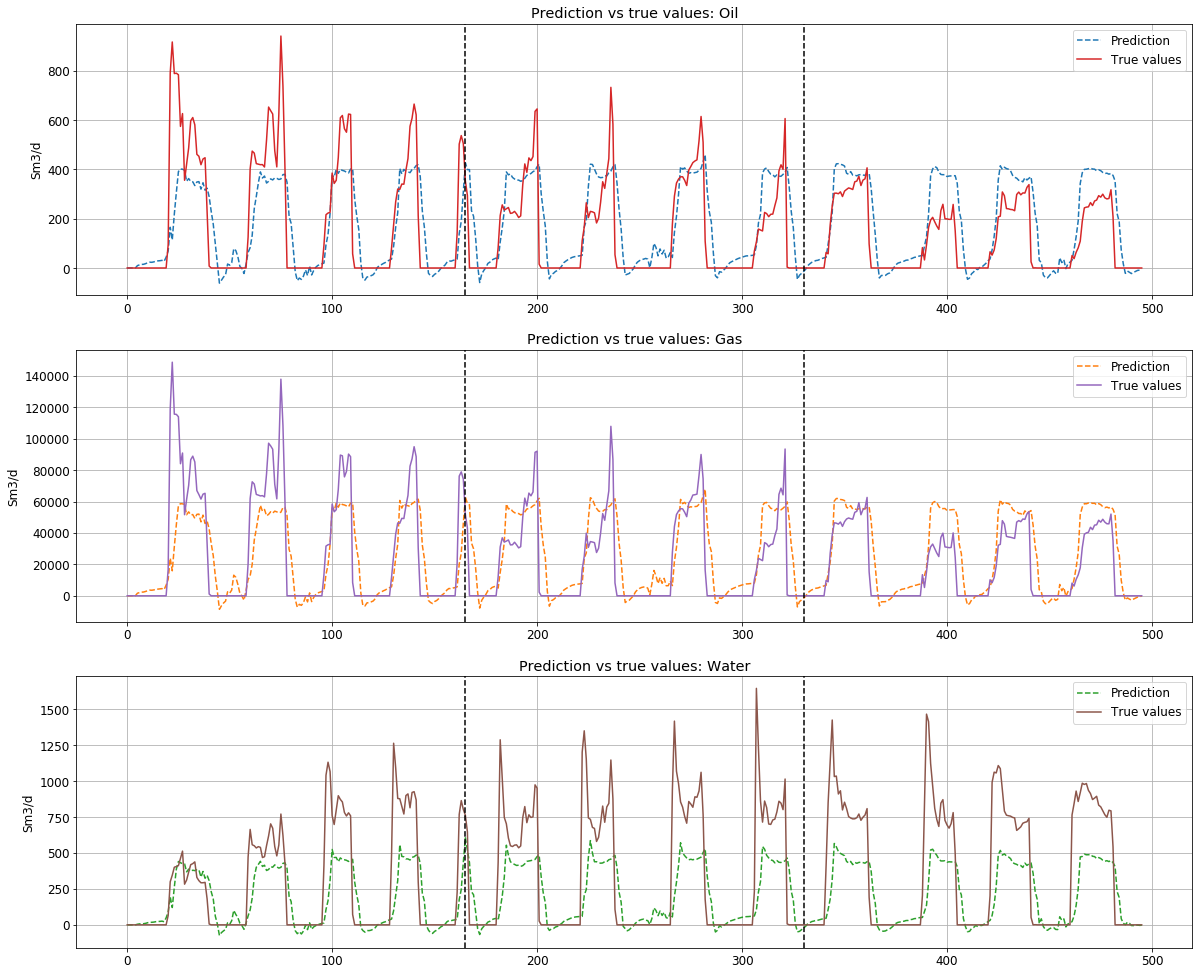

#### Tuning

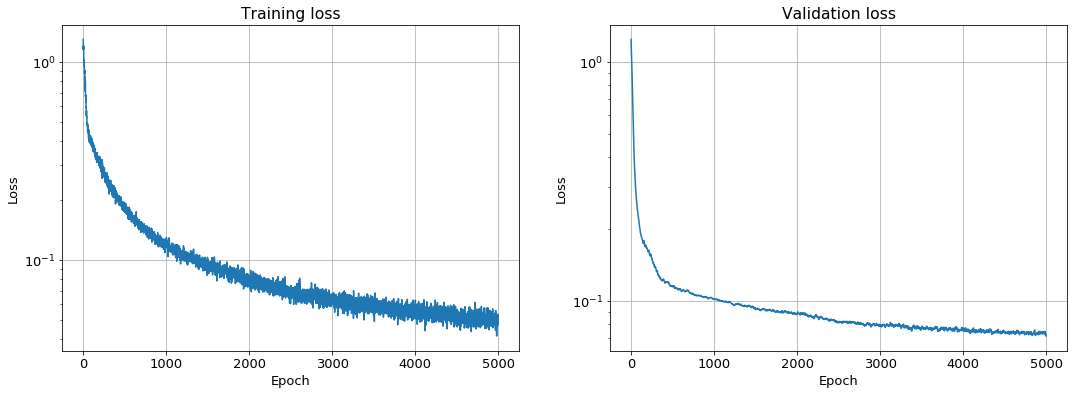

Model name:       TCN-1
Training time:    435.899 sec
Train error:      3.992
Val error:        6.172
Test error:       5.302
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/TCN-1-tuning.hdf saved


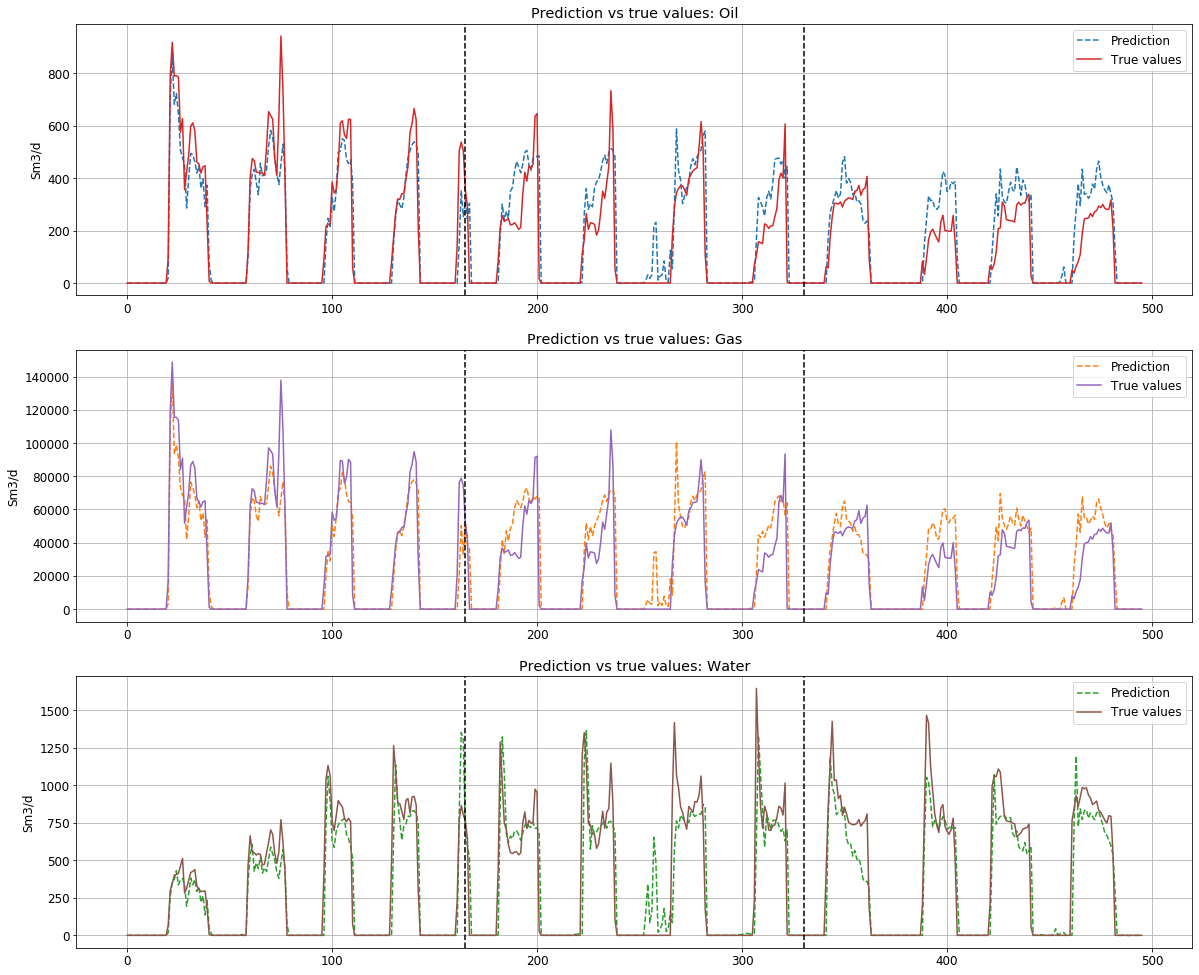

In [25]:
m = TL(model_name='TCN-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-5)

m.train(n_epochs=5000, tuning=True, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()

In [33]:
n_experiments = 5
errs, times = [], []

for i in tqdm_notebook(range(n_experiments)):
    m = TL(model_name='TCN-1', 
           study_path=STUDY_PATH, 
           real_file=REAL_FILE_ALL, 
           train_all_ratio=TRAIN_VAL_RATIO_REAL, 
           loss='mae', 
           lr=1e-5)

    m.train(n_epochs=6000, tuning=True, verbose=False)
    m.predict(plot_losses=False, plot_preds=False, plot_errs=False, print_res=False)
    err, t = m.predict(plot_losses=False, plot_preds=False, plot_errs=False, print_res=False)
    errs.append(err)
    times.append(time)
    
print (f'Error: %.2f+-%.2f' % (np.mean(errs), np.std(errs)))
# print (f'Time:  %.3f sec' % (times[0]))


Error: 6.05+-0.66


#### Transfer -> Tuning

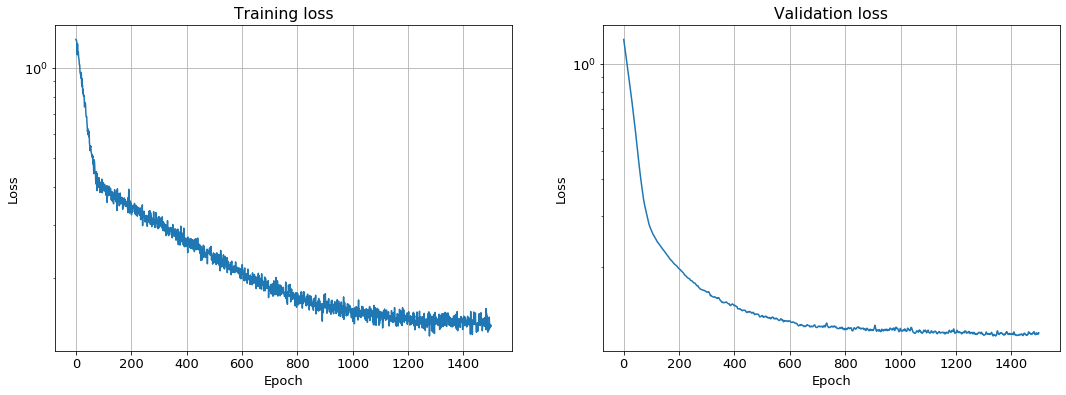

Model name:       TCN-1
Training time:    88.469 sec
Train error:      10.999
Val error:        10.773
Test error:       10.259
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/TCN-1-transf.hdf saved


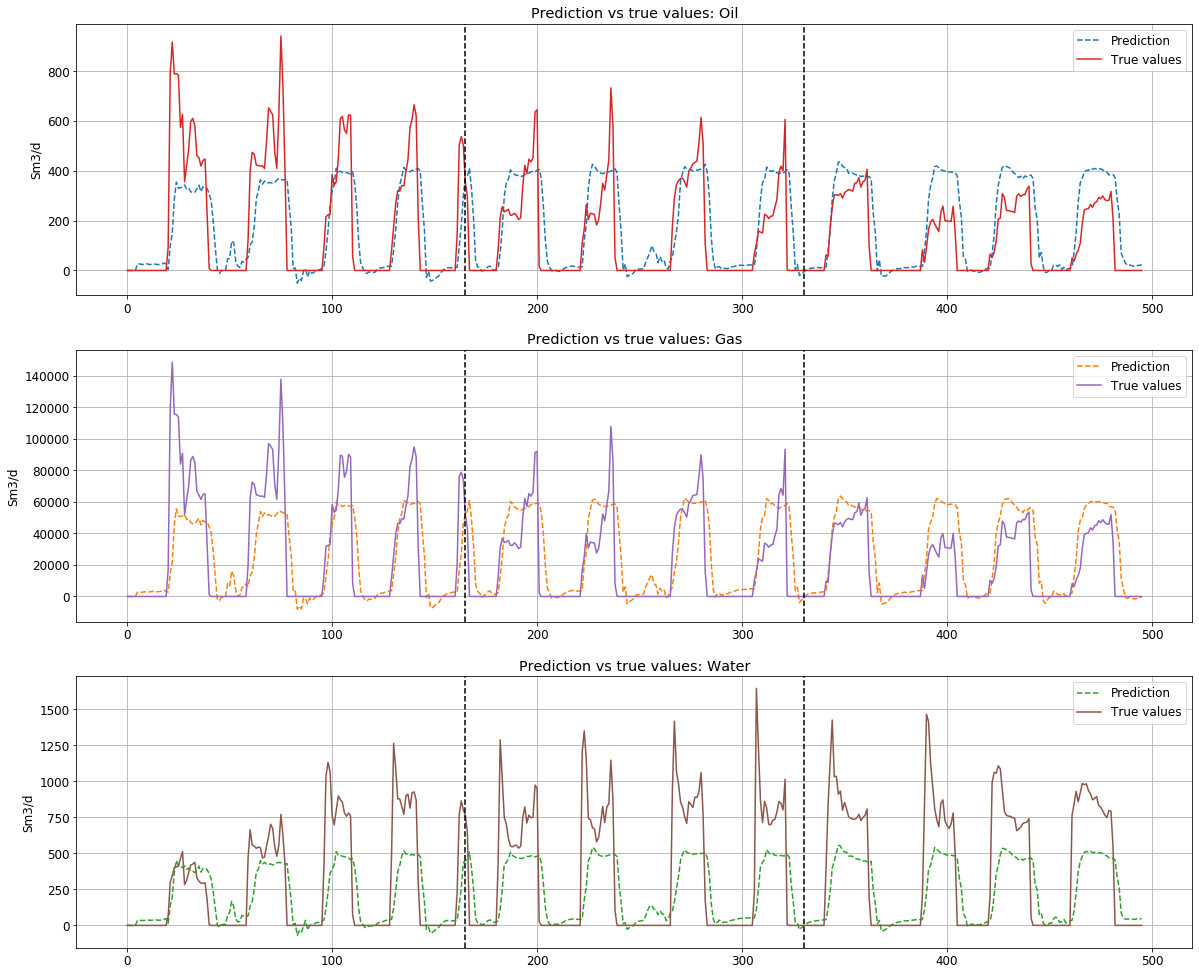

In [26]:
m = TL(model_name='TCN-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=1500, tuning=False, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()

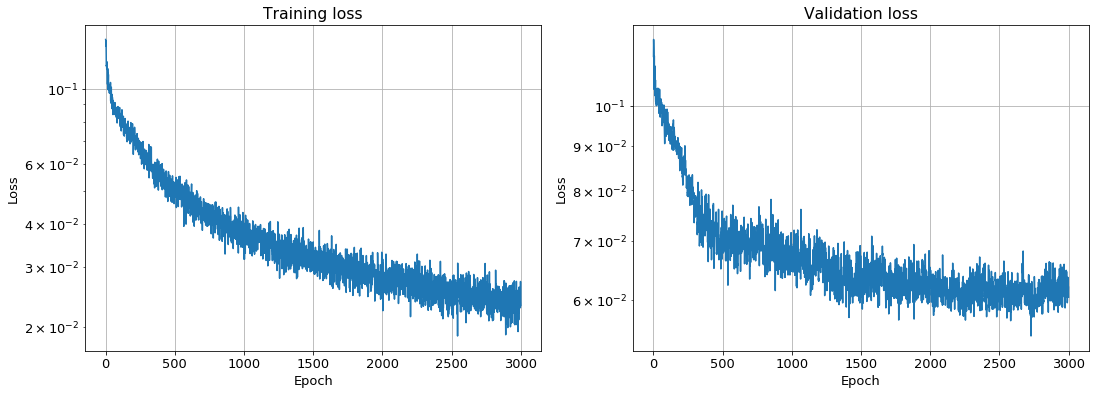

Model name:       TCN-1
Training time:    260.549 sec
Train error:      1.706
Val error:        5.372
Test error:       6.828
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/TCN-1-tuning.hdf saved


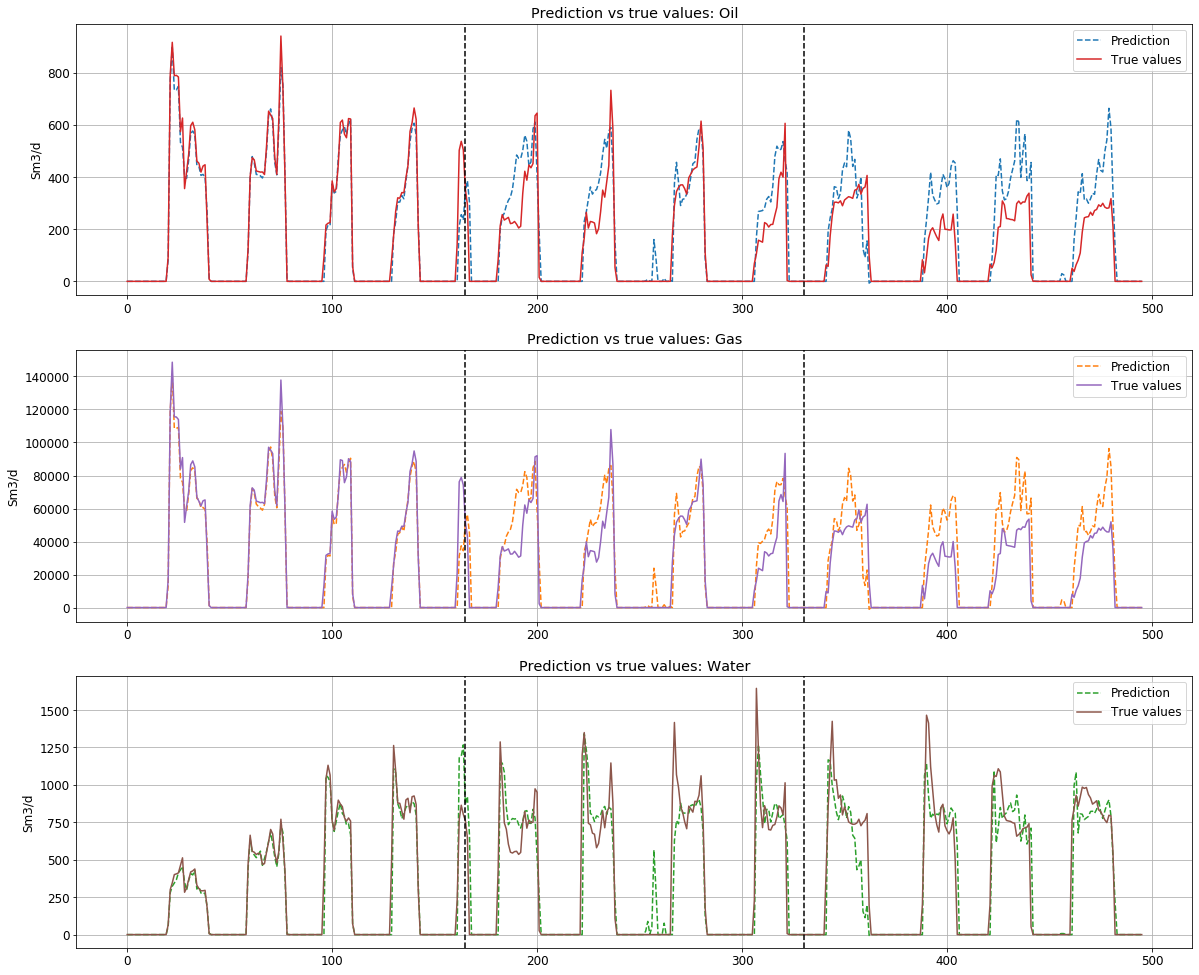

In [27]:
m.train(n_epochs=3000, tuning=True, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()

### LSTM

#### Transfer

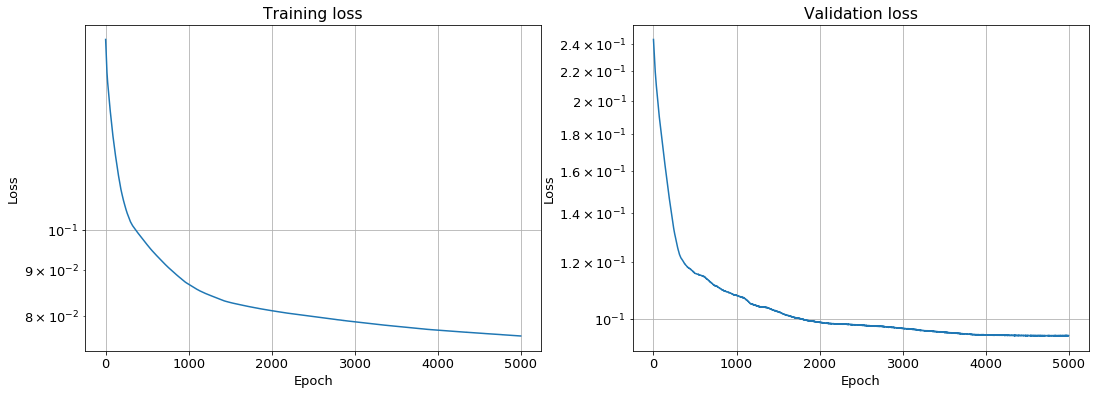

Model name:       LSTM-1
Training time:    269.282 sec
Train error:      6.846
Val error:        8.853
Test error:       9.696
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/LSTM-1-transf.hdf saved


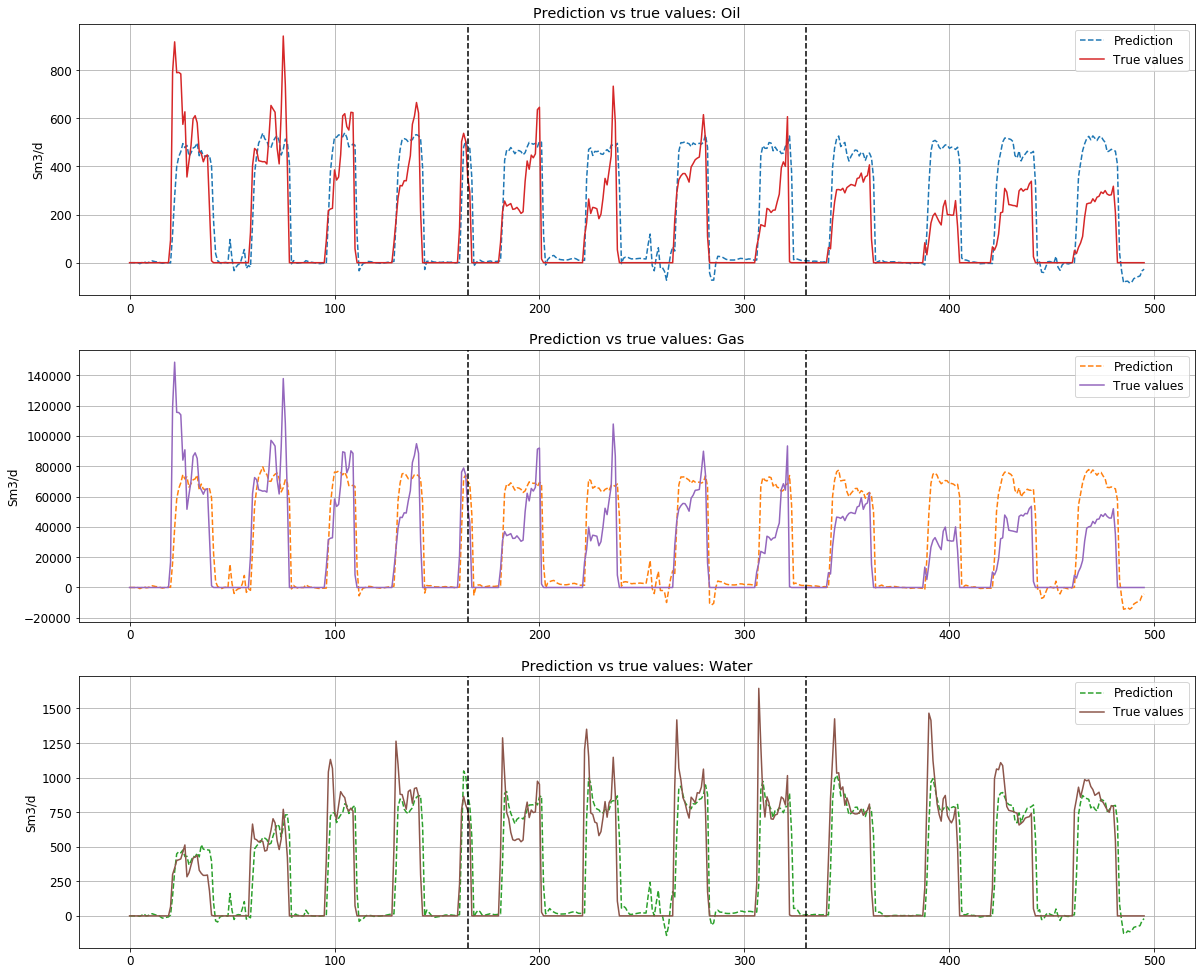

In [35]:
m = TL(model_name='LSTM-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=5000, tuning=False, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()

#### Tuning

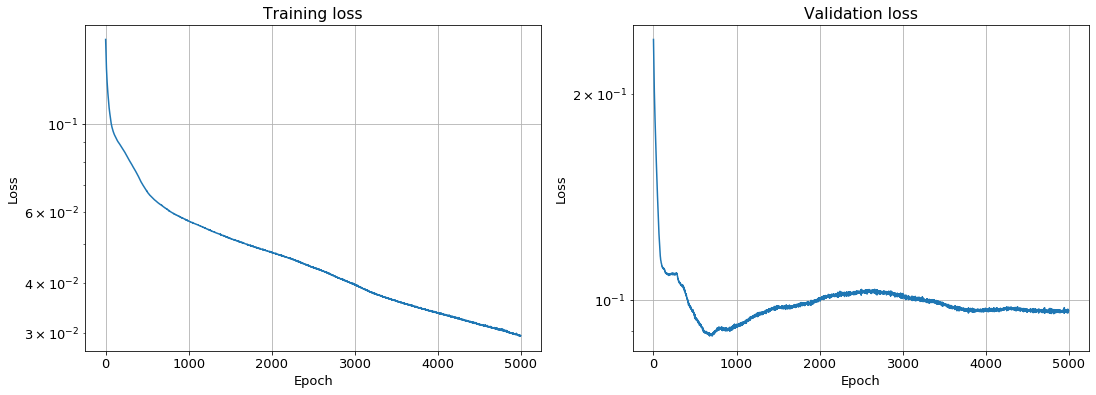

Model name:       LSTM-1
Training time:    295.126 sec
Train error:      2.591
Val error:        9.079
Test error:       7.329
C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[7]/LSTM-1-tuning.hdf saved


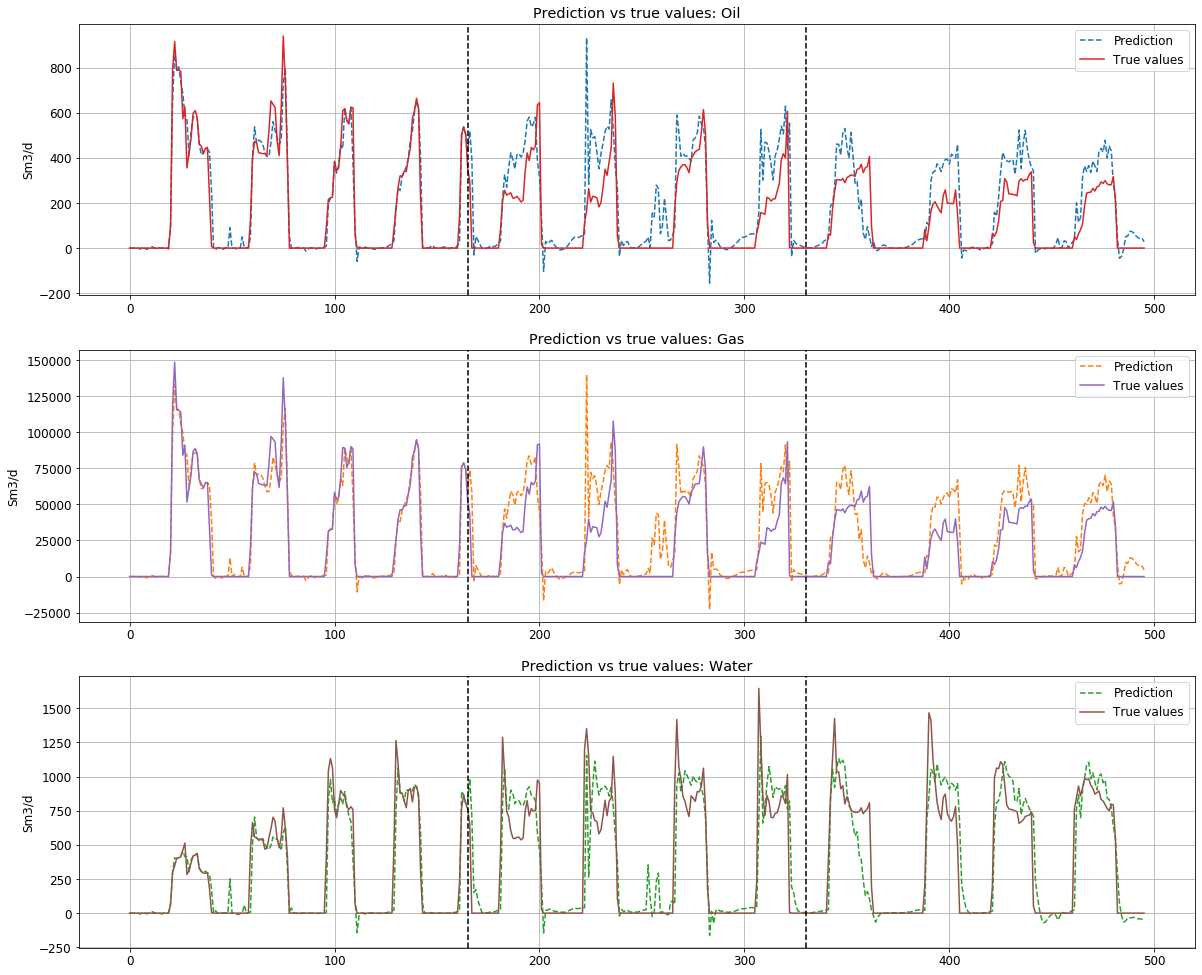

In [36]:
m = TL(model_name='LSTM-1', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=5000, tuning=True, verbose=False)
m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()